# World's largest islands

This dataset `largest-islands.csv` contains information about the 100 largest islands in the world. The unit for the `area` column is km2.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'largest-islands.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('largest-islands.csv')
df.head()

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36


### Project Ideas

- What are the 10 largest islands in the tropics?

- What are the largest islands in each `region`?

- Create a line graph with `area` on the y-axis and `rank` on the x-axis. The data should be ordered by `rank`, from largest to smallest.

- What islands are composed of multiple countries?
	- Hint: try `countries.str.contains(",")`

In [14]:
#What are the 10 largest islands in the tropics?
df.query('climate == "tropics"').sort_values('area',ascending=False).head(10)

,region,island,area,countries,climate,rank
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
28,Asia,Sumatra,480793,Indonesia,tropics,6
22,Asia,Sulawesi,188522,Indonesia,tropics,11
21,Asia,Java,129438,Indonesia,tropics,13
80,North America,Cuba,109884,Cuba,tropics,16
26,Asia,Luzon,104688,Philippines,tropics,17
14,Asia,Mindanao,94630,Philippines,tropics,19
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23


In [21]:
#What are the largest islands in each `region`?
largest_by_region = df.loc[df.groupby('region')['area'].idxmax()]
largest_by_region.sort_values('area', ascending=False)

,region,island,area,countries,climate,rank
41,Europe,Greenland,2166086,Denmark,polar,1
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
75,North America,Baffin Island,507451,Canada,polar,5
35,Eurasia,Sakhalin,76400,Russia,temperate,22
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91


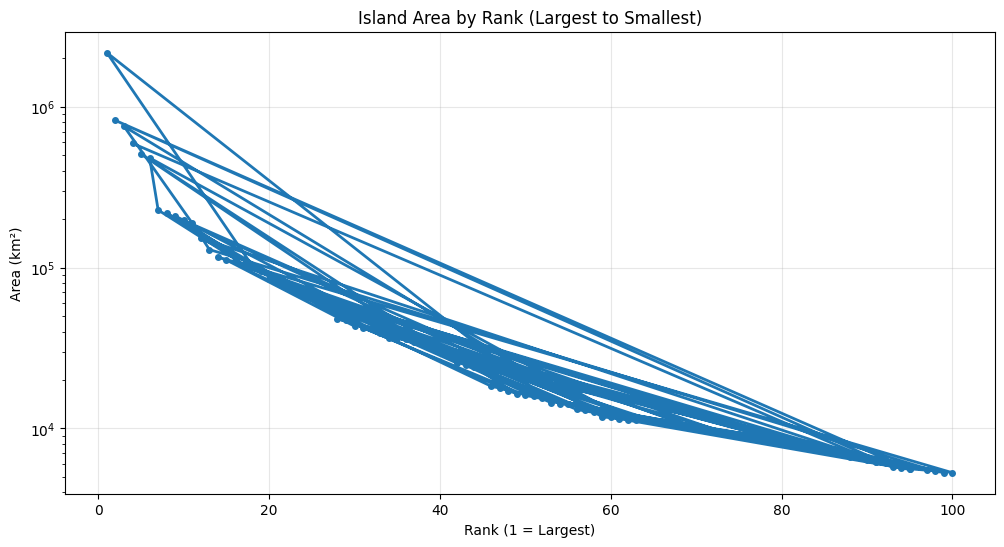

In [26]:
# Create a line graph with area on y-axis and rank on x-axis
plt.figure(figsize=(12, 6))
plt.plot(df['rank'], df['area'], marker='o', linewidth=2, markersize=4)
plt.xlabel('Rank (1 = Largest)')
plt.ylabel('Area (km²)')
plt.title('Island Area by Rank (Largest to Smallest)')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Using log scale because of large differences in size
plt.show()


In [28]:
# What islands are composed of multiple countries?
multi_country_islands = df[df['countries'].str.contains(',', na=False)]
print(f"Found {len(multi_country_islands)} islands with multiple countries:")
print()
multi_country_islands[['island', 'region', 'area', 'countries']].sort_values('area', ascending=False)

Found 7 islands with multiple countries:



,island,region,area,countries
86,New Guinea,Oceania,821400,"Papua New Guinea, Indonesia"
23,Borneo,Asia,755000,"Indonesia, Malaysia, Brunei"
45,Ireland,Europe,84421,"Ireland, United Kingdom"
73,Hispaniola,North America,76192,"Dominican Republic, Haiti"
98,Isla Grande de Tierra del Fuego,South America,47992,"Chile, Argentina"
50,Cyprus,Europe,9251,"Cyprus, United Kingdom"
1,Kerguelen,Antarctic,6200,"Antarctic Lands, France"
